In [2]:
import math, random, numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [ ]:
print(tf.config.list_physical_devices())  # CPU のみが表示されるはず
tf.random.set_seed(0); np.random.seed(0); random.seed(0)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


2025-08-13 22:57:57.241324: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [18]:
# SEQ_LENはタイムステップ数
SEQ_LEN, STEP, N = 30, 0.1, 4000

def make_series(n=N, seq_len=SEQ_LEN, step=STEP):
    X, y = [], []
    for _ in range(n): # 4000回
        s = random.uniform(0, 2 * math.pi)
        xs = np.array([math.sin(s + i * step) for i in range(seq_len + 1)], dtype=np.float32) # 0 ~ 30までの31個のデータを作成
        X.append(xs[:-1][:, None]) # (30, 1)
        y.append(xs[-1]) # (1, )
    return np.array(X), np.array(y)[:, None]

In [32]:
X, y = make_series() # (4000, 30, 1), (4000, 1)
n_tr = int(len(X) * 0.8)
Xtr, Ytr, Xva, Yva = X[:n_tr], y[:n_tr], X[n_tr:], y[n_tr:]

# Xva[:i].shape (i, 30, 1) 先頭の次元から添字i未満のデータを取り出す。
# Xva[i].shape(30, 1) 先頭の次元i個目のデータを取り出す。

In [31]:
Xtr.shape, Ytr.shape, Xva.shape, Yva.shape

((3200, 30, 1), (3200, 1), (800, 30, 1), (800, 1))

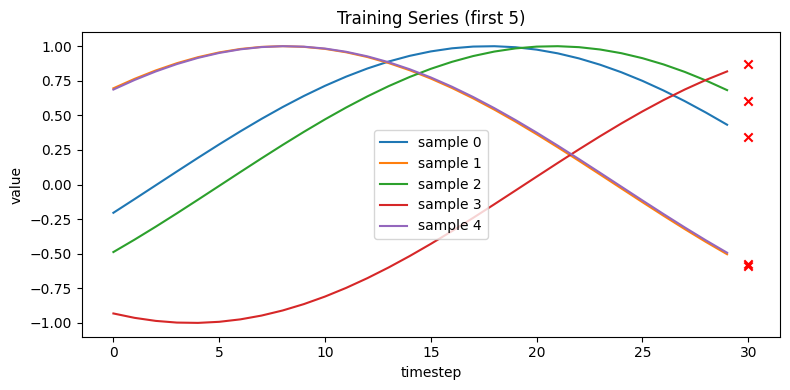

In [33]:
# ---- ここから追加: 元データの可視化 ----
plt.figure(figsize=(8,4))
for i in range(5):  # 最初の5系列を描画
    plt.plot(range(SEQ_LEN), Xtr[i].squeeze(), label=f"sample {i}")
    plt.scatter(SEQ_LEN, Ytr[i], marker='x', color='red')  # 教師値
plt.title("Training Series (first 5)")
plt.xlabel("timestep")
plt.ylabel("value")
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
model = keras.Sequential([
    layers.Input(shape=(SEQ_LEN, 1)), # 入力形状は (batch, 時系列長, 特徴数) = (B, T, C)（ここではC=1）
    layers.LSTM(64),
    layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(1e-3), loss="mse", metrics=["mse"])
model.fit(Xtr, Ytr, validation_data=(Xva, Yva), epochs=12, batch_size=64, verbose=2)

pred = model.predict(Xva[:1], verbose=0)

Epoch 1/12
50/50 - 5s - 92ms/step - loss: 0.1118 - mse: 0.1118 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 2/12
50/50 - 1s - 21ms/step - loss: 6.8583e-04 - mse: 6.8583e-04 - val_loss: 2.2570e-04 - val_mse: 2.2570e-04
Epoch 3/12
50/50 - 1s - 22ms/step - loss: 1.7627e-04 - mse: 1.7627e-04 - val_loss: 1.0720e-04 - val_mse: 1.0720e-04
Epoch 4/12
50/50 - 1s - 21ms/step - loss: 7.3417e-05 - mse: 7.3417e-05 - val_loss: 3.6637e-05 - val_mse: 3.6637e-05
Epoch 5/12
50/50 - 1s - 22ms/step - loss: 2.1464e-05 - mse: 2.1464e-05 - val_loss: 8.2149e-06 - val_mse: 8.2149e-06
Epoch 6/12
50/50 - 1s - 26ms/step - loss: 4.2987e-06 - mse: 4.2987e-06 - val_loss: 1.4864e-06 - val_mse: 1.4864e-06
Epoch 7/12
50/50 - 1s - 24ms/step - loss: 9.7773e-07 - mse: 9.7773e-07 - val_loss: 5.8399e-07 - val_mse: 5.8399e-07
Epoch 8/12
50/50 - 1s - 24ms/step - loss: 5.6192e-07 - mse: 5.6192e-07 - val_loss: 4.6941e-07 - val_mse: 4.6941e-07
Epoch 9/12
50/50 - 1s - 25ms/step - loss: 4.8981e-07 - mse: 4.8981e-07 - val_loss: 4.288

In [ ]:
print("target:", float(Yva[0]), "pred:", float(pred[0]))

予測データの描画

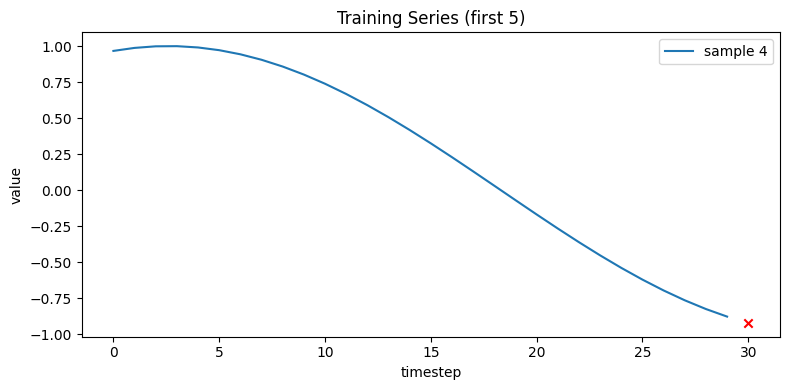

In [34]:
plt.figure(figsize=(8,4))
plt.plot(range(SEQ_LEN), Xva[0].squeeze(), label=f"sample {i}")
plt.scatter(SEQ_LEN, Yva[0], marker='x', color='red')  # 教師値
plt.title("Training Series (first 5)")
plt.xlabel("timestep")
plt.ylabel("value")
plt.legend()
plt.tight_layout()
plt.show()